In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [11]:
import os
os.chdir("R:/Downloads")
data = pd.read_csv("news.csv")

In [12]:
print('Dimension of dataset: ', data.shape)


Dimension of dataset:  (6335, 4)


In [13]:
print('Attributes in the dataset: ', data.columns.values)
data.head()


Attributes in the dataset:  ['Unnamed: 0' 'title' 'text' 'label']


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [15]:
# remove column 'Unnamed: 0' from the analysis
data.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

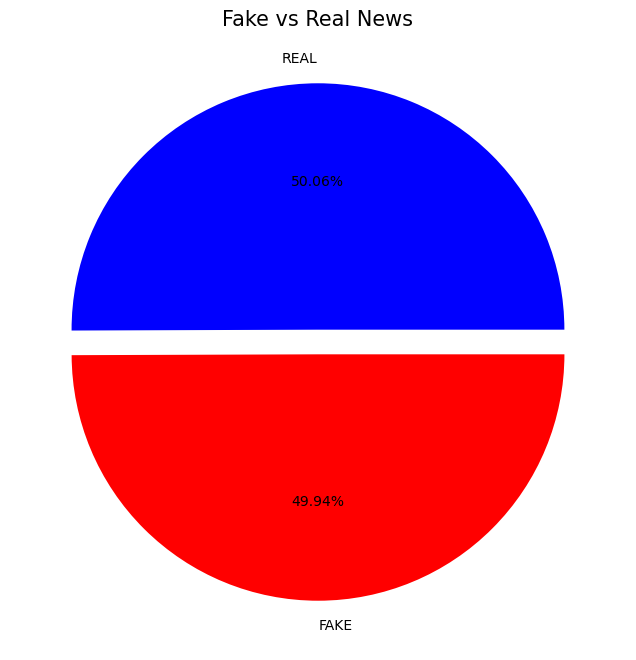

In [17]:
# check the distribution of label (Fake vs Real news)
labels = data['label'].value_counts()
plt.figure(figsize=(10,8))
plt.pie(labels.values, labels=labels.index, autopct='%.2f%%', explode=([0.05]*len(labels.index)), colors=['blue','red'])
plt.title('Fake vs Real News', fontsize=15)
plt.show()

In [19]:
# install SpaCy for performing text classification
!pip install spacy

In [20]:
# download a language model in SpaCy
!python -m spacy download en_core_web_lg

     ---------------------------------------- 0.0/587.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/587.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/587.7 MB ? eta -:--:--
     -------------------------------------- 0.0/587.7 MB 131.3 kB/s eta 1:14:37
     -------------------------------------- 0.0/587.7 MB 131.3 kB/s eta 1:14:37
     -------------------------------------- 0.0/587.7 MB 131.3 kB/s eta 1:14:37
     -------------------------------------- 0.0/587.7 MB 140.3 kB/s eta 1:09:50
     -------------------------------------- 0.1/587.7 MB 163.8 kB/s eta 0:59:47
     -------------------------------------- 0.1/587.7 MB 206.9 kB/s eta 0:47:21
     -------------------------------------- 0.1/587.7 MB 218.5 kB/s eta 0:44:49
     -------------------------------------- 0.1/587.7 MB 245.8 kB/s eta 0:39:51
     -------------------------------------- 0.1/587.7 MB 266.9 kB/s eta 0:36:42
     -------------------------------------- 0.1/587.7 MB 271.

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     ------------------------ ----------- 402.1/587.7 MB 169.8 kB/s eta 0:18:13
     ------------------------ ----------- 402.1/587.7 MB 169.8 kB/s eta 0:18:13
     ------------------------ ----------- 402.1/587.7 MB 169.8 kB/s eta 0:18:13
     ------------------------ ----------- 402.2/587.7 MB 170.3 kB/s eta 0:18:10
     ------------------------ ----------- 402.2/587.7 MB 170.3 kB/s eta 0:18:10
     ------------------------ ----------- 402.2/587.7 MB 170.6 kB/s eta 0:18:08
     ------------------------ ----------- 402.2/587.7 MB 170.6 kB/s eta 0:18:08
     ------------------------ ----------- 402.2/587.7 MB 170.6 kB/s eta 0:18:08
     ------------------------ ----------- 402.2/587.7 MB 170.9 kB/s eta 0:18:06
     ------------------------ ----------- 402.2/587.7 MB 170.9 kB/s eta 0:18:06
     ------------------------ ----------- 402.2/587.7 MB 170.9 kB/s eta 0:18:06
     ------------------------ ----------- 402.2/587.7 MB 170.9 kB/s eta 0:18:06
     ------------------------ ----------

In [21]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [27]:

data['textVector'] = data['text'].apply(lambda x: nlp(x).vector)
data_copy = data.copy()
data_copy.drop(columns=['title','text'], axis=1, inplace=True)

# split the dataset into training and test datasets
from sklearn.model_selection import train_test_split

train, test = train_test_split(data_copy, test_size=0.2, random_state=122)

# check the dimension of the train and test data
print('Dimension of training data: ', train.shape)
print('Dimension of test dat: ', test.shape)


Dimension of training data:  (5068, 2)
Dimension of test dat:  (1267, 2)


In [28]:
Xtrain = train['textVector']
ytrain = train['label']

Xtest = test['textVector']
ytest = test['label']

In [29]:

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
ytrain_encoded = encoder.fit_transform(ytrain)
ytest_encoded = encoder.transform(ytest)


In [30]:
Xtrain = np.array(Xtrain)
Xtest = np.array(Xtest)

Xtrain_2d = np.stack(Xtrain)
Xtest_2d = np.stack(Xtest)

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain_2d)
Xtest_scaled = scaler.transform(Xtest_2d)

In [32]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
mNB = clf.fit(Xtrain_scaled, ytrain_encoded)

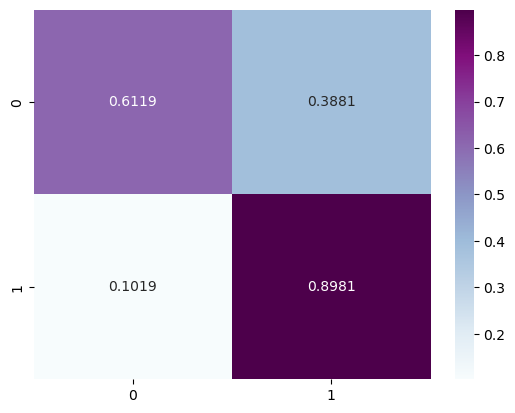

              precision    recall  f1-score   support

           0       0.88      0.61      0.72       688
           1       0.66      0.90      0.76       579

    accuracy                           0.74      1267
   macro avg       0.77      0.76      0.74      1267
weighted avg       0.78      0.74      0.74      1267



In [33]:
from sklearn.metrics import confusion_matrix, classification_report

ypred = mNB.predict(Xtest_scaled)

# confusion matrix
confusionMatrix = confusion_matrix(ytest_encoded,ypred, normalize='true')

plt.figure()
sns.heatmap(confusionMatrix, annot=True, cmap='BuPu', fmt='.4g')
plt.show()

# classification report
report = classification_report(ytest_encoded, ypred)
print(report)